In [44]:
# 1：ライブラリのインポート--------------------------------
import numpy as np #numpyという行列などを扱うライブラリを利用
import pandas as pd #pandasというデータ分析ライブラリを利用
import matplotlib.pyplot as plt #プロット用のライブラリを利用
from sklearn import preprocessing, linear_model #機械学習用のライブラリを利用
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
import sklearn
from sklearn.preprocessing import PolynomialFeatures
sklearn.__version__

'0.22.1'

In [49]:
N_SPLITS = 5
SEED = 42

kf = KFold(n_splits=10, shuffle=True, random_state=42)

def run_model(X, y):

    # Initialize variables
    y_oof_pred = np.zeros(len(X))

    kf = KFold(n_splits=10, shuffle=True, random_state=SEED)
    
    sc=preprocessing.StandardScaler()
    sc.fit(X)
    X=sc.transform(X)


    for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):

        # Prepare training and validation data
        X_train = X[train_idx]
        X_val = X[val_idx]

        y_train = y.iloc[train_idx].reset_index(drop=True)
        y_val = y.iloc[val_idx].reset_index(drop=True)  


        # Define model
        model = linear_model.LinearRegression()
        model.fit(X_train, y_train)

        y_val_pred = model.predict(X_val)
        y_oof_pred[val_idx] = y_val_pred


    


    return y_oof_pred


In [50]:
subjects = ['E', 'F', 'G', 'H', 'I', 'J', 'K']
task_list = ['task1','task2','task3','task4']
params = ['pNN50', 'RMSSD', 'CVRR', 'SDNN', 'HR', 'LPS', 'CSI','CVI', 'SCL', 'HF', 'LF', 'LF/HF', 'TotalPow']

df_coef = pd.DataFrame()
df_r2 = pd.DataFrame()
df_r2_modified = pd.DataFrame()
for task in task_list:   
    coef_list = []
    r2_list = []
    r2_modified_list = []
    for subject in subjects:
        df = pd.read_csv("../time_series/" + subject + "/" + task + ".csv", index_col=0)
        
        N = len(df)
        p = len(params)
        X = df[params]
        y = df['correct']

        pred = run_model(X, y, 1)

        coef = np.corrcoef(y, pred)
        r2 = r2_score(y,pred)
        r2_modified = 1-(N-1)/(N-p)*(1-r2)

        coef_list.append(coef[0,1])
        r2_list.append(r2_score(y, pred))
        r2_modified_list.append(r2_modified)
    df_coef[task] = coef_list
    df_r2[task] = r2_list
    df_r2_modified[task] = r2_modified_list


In [52]:
df_coef

,task1,task2,task3,task4
0,0.676507,0.893327,0.557811,0.714234
1,0.588050,0.459685,0.747766,0.450085
2,0.839188,0.490301,0.923984,0.958648
3,0.584550,0.480809,0.770397,0.895571
4,0.542655,0.502644,0.702805,0.657223
5,0.737464,0.466243,0.565496,0.090995
6,0.294040,0.453941,0.734128,0.708058


In [37]:
df_param = pd.DataFrame()

coef_list = []
r2_list = []
r2_modified_list = []
for subject in subjects:
    for task in task_list:    
        df = pd.read_csv("../time_series/" + subject + "/" + task + ".csv", index_col=0)
        df_param = pd.concat([df_param, df])
    N = len(df_param)
    p = len(params)
    X = df_param[params]
    y = df_param['correct']

    pred = run_model(X, y)
    coef = np.corrcoef(y, pred)
    r2 = r2_score(y,pred)
    r2_modified = 1-(N-1)/(N-p)*(1-r2)

    coef_list.append(coef[0,1])
    r2_list.append(r2)
    r2_modified_list.append(r2_modified)
df_coef['total'] = coef_list   
df_r2['total'] = r2_list
df_r2_modified['total'] = r2_modified_list

In [38]:
df_coef.index = subjects
df_coef

,task1,task2,task3,task4,total
E,0.676507,0.893327,0.557811,0.714234,0.631015
F,0.588050,0.459685,0.747766,0.450085,0.380473
G,0.839188,0.490301,0.923984,0.958648,0.320110
H,0.584550,0.480809,0.770397,0.895571,0.342901
I,0.542655,0.502644,0.702805,0.657223,0.307238
J,0.737464,0.466243,0.565496,0.090995,0.321089
K,0.294040,0.453941,0.734128,0.708058,0.247955


In [39]:
df_r2.index = subjects
df_r2

,task1,task2,task3,task4,total
E,0.449678,0.796893,0.290625,0.416632,0.396681
F,0.335890,-0.035563,0.545830,-0.848760,0.141770
G,0.665476,-0.190684,0.853399,0.918454,0.101776
H,0.334517,0.162626,0.587167,0.801752,0.117240
I,0.174837,0.166605,0.465310,0.392443,0.094150
J,0.541294,0.192013,0.248519,-0.354648,0.102939
K,-2.900836,0.121373,0.524680,0.490941,0.061328


In [40]:
df_r2_modified

,task1,task2,task3,task4,total
0,0.395101,0.772274,0.211069,0.337082,0.380734
1,0.286082,-0.138263,0.516049,-1.056097,0.132208
2,0.637791,-0.344321,0.840834,0.907459,0.095022
3,0.291115,0.097376,0.560096,0.783452,0.112632
4,0.095622,0.077312,0.409516,0.321660,0.090276
5,0.500520,0.102237,0.182212,-0.517206,0.099713
6,-3.287696,0.012677,0.428004,0.424542,0.058331


NameError: name 'y' is not defined

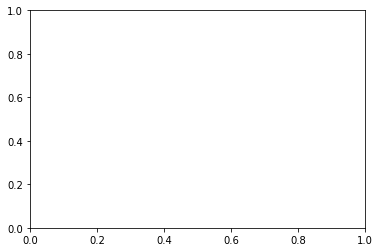

In [5]:
ax = plt.subplot(111)
ax.scatter(y, pred)
ax.set_ylim(0, 1)

In [ ]:
# 相関行列を計算
coef = np.corrcoef(y, pred)

# 相関行列を表示
print(coef)

Fold 1:
Fold 2:
Fold 3:
Fold 4:
Fold 5:
Fold 6:
Fold 7:
Fold 8:
Fold 9:
Fold 10:
Fold 1:
Fold 2:
Fold 3:
Fold 4:
Fold 5:
Fold 6:
Fold 7:
Fold 8:
Fold 9:
Fold 10:
Fold 1:
Fold 2:
Fold 3:
Fold 4:
Fold 5:
Fold 6:
Fold 7:
Fold 8:
Fold 9:
Fold 10:
Fold 1:
Fold 2:
Fold 3:
Fold 4:
Fold 5:
Fold 6:
Fold 7:
Fold 8:
Fold 9:
Fold 10:


In [11]:
coef_list

[0.7374637761236285,
 0.46624321813352343,
 0.5654957931801172,
 0.09099498741507074]